### Importing the Libraries

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [3]:
tf.__version__ 

'2.18.0'

### Part 1 - Data Preprocessing

#### Generating images for the Training set

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values
    shear_range=0.3,         # More aggressive shearing
    zoom_range=0.3,          # More zooming variation
    rotation_range=20,       # Introduce random rotations
    width_shift_range=0.2,   # Allow horizontal shifts
    height_shift_range=0.2,  # Allow vertical shifts
    brightness_range=[0.8, 1.2],  # Random brightness adjustment
    horizontal_flip=True,    # Flip images horizontally
    fill_mode="nearest"      # Fill in missing pixels after transformation
)

#### Generating images for the Test set

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)

### Creating the Training set

In [5]:
training_set = train_datagen.flow_from_directory('../dataSet/trainingData',                                
                                                 target_size = (128, 128),
                                                 batch_size = 10,
                                                 color_mode = 'grayscale',                                
                                                 class_mode = 'categorical')

Found 12845 images belonging to 27 classes.


In [6]:
test_set = test_datagen.flow_from_directory('../dataSet/testingData',
                                            target_size = (128, 128),                                  
                                            batch_size = 10,    
                                            color_mode = 'grayscale',
                                            class_mode = 'categorical')

Found 4268 images belonging to 27 classes.


In [9]:
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Conv2D(filters=32,
                                     kernel_size=3, 
                                     padding="same", 
                                     activation="relu", 
                                     input_shape=[128, 128, 1]))

classifier.add(tf.keras.layers.MaxPool2D(pool_size=2, 
                                         strides=2, 
                                         padding='valid'))

classifier.add(tf.keras.layers.Conv2D(filters=32, 
                                      kernel_size=3, 
                                      padding="same", 
                                      activation="relu"))

classifier.add(tf.keras.layers.MaxPool2D(pool_size=2, 
                                         strides=2, 
                                         padding='valid'))

classifier.add(tf.keras.layers.Flatten())

classifier.add(tf.keras.layers.Dense(units=128, 
                                     activation='relu'))

classifier.add(tf.keras.layers.Dense(units=128, activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.40))
classifier.add(tf.keras.layers.Dense(units=96, activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.40))
classifier.add(tf.keras.layers.Dense(units=64, activation='relu'))
classifier.add(tf.keras.layers.Dense(units=27, activation='softmax')) 

classifier.compile(optimizer = 'adam', 
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Stop after 5 epochs with no improvement
    restore_best_weights=True,  # Restore the best model
    verbose=1
)

classifier.summary()

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 96)             │        12,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 27)             │         1,755 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,240,859 (16.18 MB)

 Trainable params: 4,240,859 (16.18 MB)

 Non-trainable params: 0 (0.00 B)

#### Saving the Model

In [32]:
history = classifier.fit(training_set,
                  epochs =6,
                  validation_data = test_set)

Epoch 1/6
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 153s 116ms/step - accuracy: 0.0812 - loss: 3.1318 - val_accuracy: 0.3261 - val_loss: 1.9111
Epoch 2/6
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 132s 103ms/step - accuracy: 0.2388 - loss: 2.2613 - val_accuracy: 0.6108 - val_loss: 1.0713
Epoch 3/6
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 136s 106ms/step - accuracy: 0.3755 - loss: 1.8033 - val_accuracy: 0.6518 - val_loss: 0.8883
Epoch 4/6
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 141s 110ms/step - accuracy: 0.4887 - loss: 1.4788 - val_accuracy: 0.7020 - val_loss: 0.7277
Epoch 5/6
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 139s 108ms/step - accuracy: 0.5435 - loss: 1.2718 - val_accuracy: 0.7151 - val_loss: 0.7256
Epoch 6/6
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 137s 106ms/step - accuracy: 0.5877 - loss: 1.1657 - val_accuracy: 0.7701 - val_loss: 0.5861


In [34]:
history = classifier.fit(training_set,
                  epochs =7,
                  validation_data = test_set,initial_epoch=6)

Epoch 7/7
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 131s 102ms/step - accuracy: 0.6739 - loss: 0.9126 - val_accuracy: 0.7936 - val_loss: 0.5341


In [ ]:

classifier.save("model_new2.keras")
print("Model saved in .keras format")

Model saved in .keras format


In [ ]:
from tensorflow import keras
classifier = keras.models.load_model("model_new2.keras")
test_loss, test_accuracy = classifier.evaluate(test_set)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


427/427 ━━━━━━━━━━━━━━━━━━━━ 33s 75ms/step - accuracy: 0.7911 - loss: 0.5534
Test Accuracy: 79.36%
Test Loss: 0.5341


In [14]:
test_loss, test_accuracy = classifier.evaluate(training_set)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1285/1285 ━━━━━━━━━━━━━━━━━━━━ 115s 89ms/step - accuracy: 0.7552 - loss: 0.6761
Test Accuracy: 75.33%
Test Loss: 0.6750


427/427 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step
              precision    recall  f1-score   support

           0       0.02      0.02      0.02       154
           1       0.03      0.03      0.03       156
           2       0.04      0.08      0.05       157
           3       0.03      0.03      0.03       156
           4       0.02      0.02      0.02       155
           5       0.02      0.03      0.03       156
           6       0.03      0.01      0.01       165
           7       0.01      0.01      0.01       153
           8       0.07      0.08      0.07       165
           9       0.02      0.01      0.02       157
          10       0.03      0.02      0.03       166
          11       0.03      0.03      0.03       164
          12       0.03      0.03      0.03       155
          13       0.02      0.04      0.03       165
          14       0.06      0.03      0.04       163
          15       0.03      0.04      0.03       167
          16       0.02      0.03      

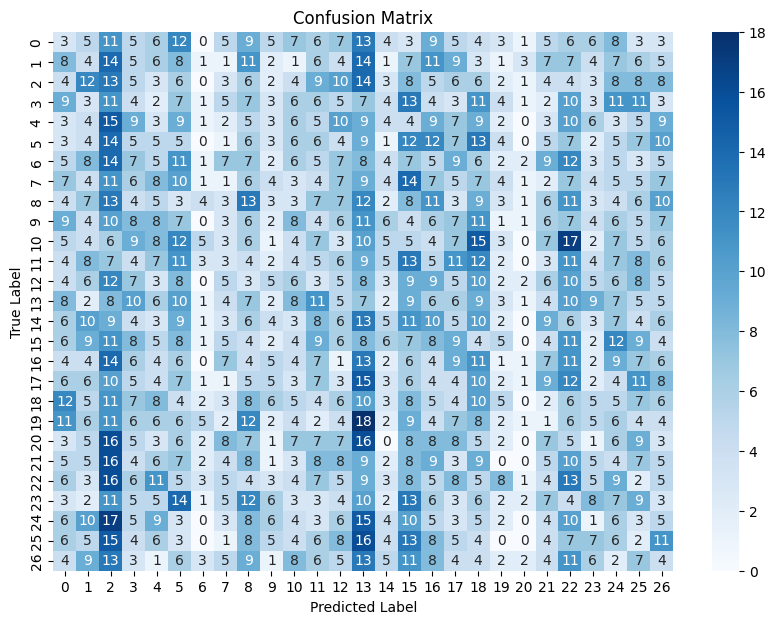

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
# Get true labels
y_true = test_set.classes

# Get predicted labels
y_pred = np.argmax(classifier.predict(test_set), axis=1)

# Print classification report
print(classification_report(y_true, y_pred))

# Display confusion matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
